In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df_freq = pd.read_csv('./freq_celltype.csv')

In [5]:
df_degs = pd.read_csv('./dream_test.csv', index_col = 0)

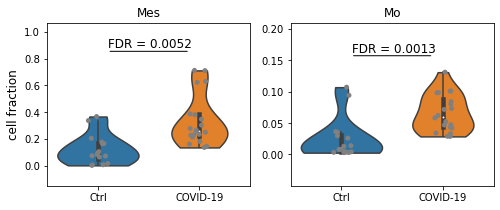

In [6]:
import seaborn as sns


fig, axes = plt.subplots(1, 2, figsize = (8, 3))

ct = 'Mes'
t = 'choroidplexus'
p = df_degs[(df_degs.Tissue == t) & (df_degs.Gene == ct)].fdr.values[0]
df_tmp = df_freq[df_freq.tissue == t]

ax = axes[0]
ax = sns.violinplot(x='covid', y=ct, data=df_tmp, ax = ax, cut = 0)
ax = sns.stripplot(x='covid', y=ct, data=df_tmp, ax = ax, color = 'gray')
plt.sca(ax)
plt.ylabel('cell fraction', fontsize = 12)
plt.xlabel('')
plt.xticks([0, 1], ['Ctrl', 'COVID-19'])
ymax = max(df_tmp[ct].values) * 1.2

plt.annotate('', xy=(.1, ymax),xytext=(.9, ymax),                     #draws an arrow from one set of coordinates to the other
            arrowprops=dict(arrowstyle='-',facecolor='red'),   #sets style of arrow and colour
            annotation_clip=False)                               #This enables the arrow to be outside of the plot
plt.ylim([-0.15, ymax * 1.25])
plt.text(.1, ymax * 1.03, 'FDR = %.4f' % p, fontsize = 12)
plt.title(ct)

ct = 'Mo'
t = 'choroidplexus'
p = df_degs[(df_degs.Tissue == t) & (df_degs.Gene == ct)].fdr.values[0]
df_tmp = df_freq[df_freq.tissue == t]

ax = axes[1]
ax = sns.violinplot(x='covid', y=ct, data=df_tmp, ax = ax, cut = 0)
ax = sns.stripplot(x='covid', y=ct, data=df_tmp, ax = ax, color = 'gray')
plt.sca(ax)
plt.ylabel('')
plt.xlabel('')
plt.xticks([0, 1], ['Ctrl', 'COVID-19'])

ymax = max(df_tmp[ct].values) * 1.2
plt.ylim([-0.05, 0.21])
plt.yticks([0, 0.05, 0.1, 0.15, 0.2])
plt.annotate('', xy=(.1, ymax),xytext=(.9, ymax),                     #draws an arrow from one set of coordinates to the other
            arrowprops=dict(arrowstyle='-',facecolor='red'),   #sets style of arrow and colour
            annotation_clip=False)                               #This enables the arrow to be outside of the plot
plt.title(ct)
plt.text(.1, ymax * 1.03, 'FDR = %.4f' % p, fontsize = 12)
plt.savefig("../figs/cell_fraction_Mes_Mo_violin.pdf")
plt.savefig("../figs/png/cell_fraction_Mes_Mo_violin.png", dpi = 600)
plt.show()